#Import Data


In [1]:
import pandas as pd

In [49]:
df_train = pd.read_csv('/content/sample_data/train.csv')
df_test = pd.read_csv('/content/sample_data/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#Import Libraries

#Data Analysis

In [50]:
sex_mapping = {
    'female' : 0,
    'male' : 1
}
embarked_mapping = {
    'S' : 0,
    'C' : 1,
    'Q' : 2,
}

df_train['Sex'] = df_train['Sex'].map(sex_mapping)
df_train['Embarked'] = df_train['Embarked'].map(embarked_mapping)
df_test['Sex'] = df_test['Sex'].map(sex_mapping)
df_test['Embarked'] = df_test['Embarked'].map(embarked_mapping)

In [51]:
df_test.shape

(418, 11)

In [52]:
df_train.shape

(891, 12)

In [53]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [54]:
df_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.362205
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.636157
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [55]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [56]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,0.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,1.0


In [57]:
df_train.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

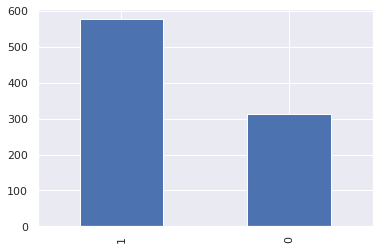

In [59]:
df_train.Sex.value_counts().plot(kind = 'bar')

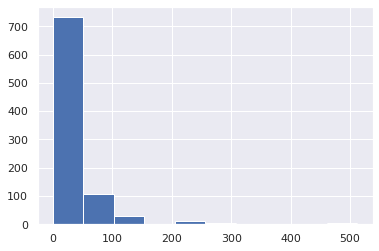

In [60]:
df_train.Fare.hist()

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [62]:
df_copy = df_train

def bar_chart(feature):
    survived = df_copy[df_copy['Survived'] == 1][feature].value_counts()
    dead = df_copy[df_copy['Survived'] == 0][feature].value_counts()
    df_new = pd.DataFrame([survived, dead])
    df_new.index = ['Survived', 'Dead']
    df_new.plot(kind = 'bar', stacked = True, figsize = (10,5))

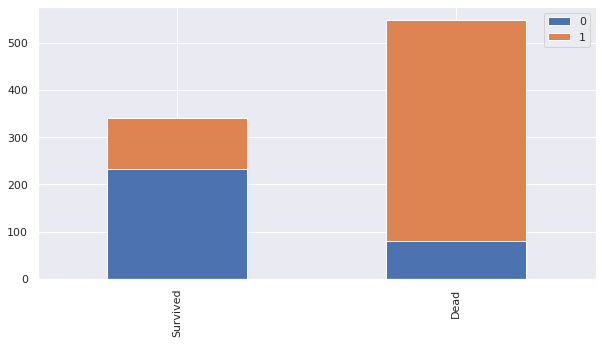

In [63]:
bar_chart('Sex')

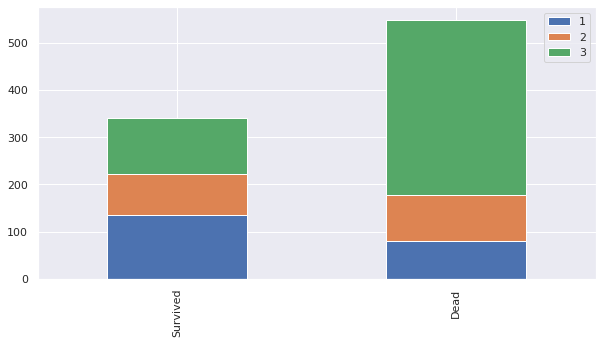

In [64]:
bar_chart('Pclass')

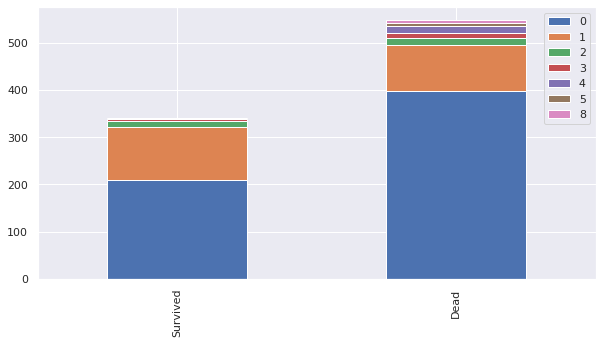

In [65]:
bar_chart('SibSp')

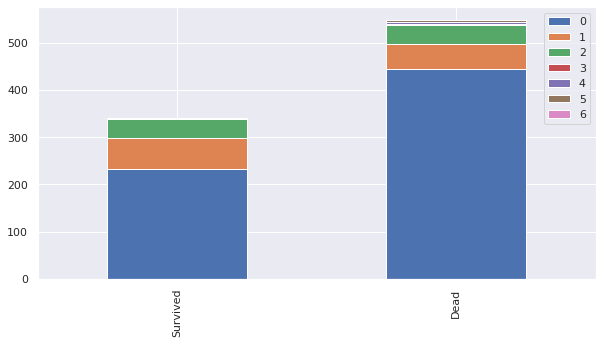

In [66]:
bar_chart('Parch')

In [67]:
df_new = [df_train]
for dataset in df_new:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [68]:
df_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Ms            1
Mme           1
Jonkheer      1
Sir           1
Countess      1
Lady          1
Capt          1
Name: Title, dtype: int64

In [69]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3,      
                 "Dr": 3, "Rev": 3,   "Mlle": 3, "Major": 3,         
                 "Col": 3, "Jonkheer": 3, "Sir": 3, "Ms": 3,          
                 "Capt": 3, "Lady": 3, "Countess": 3, "Mme": 3,
                 "Don": 3
                }
for df_train in df_new:
    df_train['Title'] = df_train['Title'].map(title_mapping)

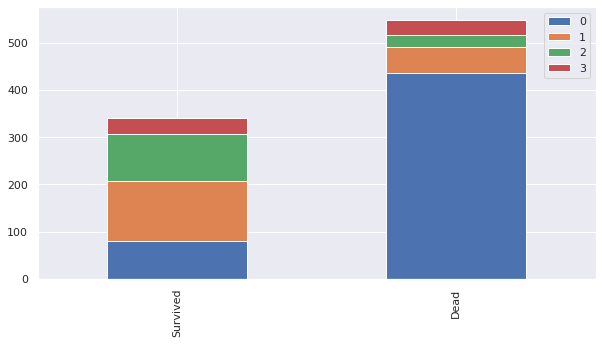

In [70]:
bar_chart('Title')

In [71]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [72]:
missing_ages = df_train[df_train['Age'].isnull()]

In [73]:
mean_ages = df_train.groupby(['Sex', 'Pclass'])['Age'].mean()

In [74]:
mean_ages

Sex  Pclass
0    1         34.611765
     2         28.722973
     3         21.750000
1    1         41.281386
     2         30.740707
     3         26.507589
Name: Age, dtype: float64

In [75]:
def fill_nan_ages(row):
    
    if pd.isnull(row['Age']):
        return mean_ages[row['Sex'], row['Pclass']]
    else:
        return row['Age']

In [76]:
df_train['Age'] = df_train.apply(fill_nan_ages, axis = 1)

In [77]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [78]:
for dataset in df_new:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[ dataset['Age'] > 16 & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[ dataset['Age'] > 26 & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[ dataset['Age'] > 36 & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [79]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,3.0,1,0,A/5 21171,7.2500,NaN,0.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3.0,1,0,PC 17599,71.2833,C85,1.0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,3.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3.0,1,0,113803,53.1000,C123,0.0,2
4,5,0,3,"Allen, Mr. William Henry",1,3.0,0,0,373450,8.0500,NaN,0.0,0


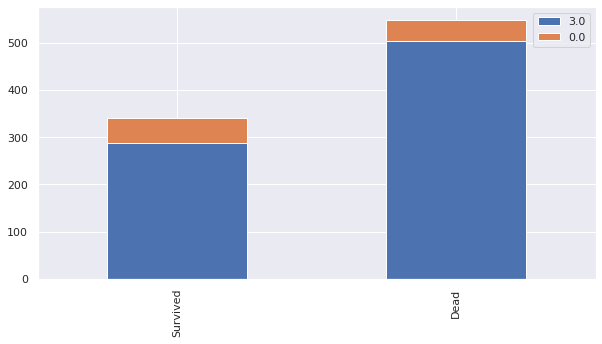

In [80]:
bar_chart('Age')

In [81]:
columns_toDrop = ['PassengerId', 'Name', 'Ticket', 'Cabin']

df_train = df_train.drop(columns = columns_toDrop)

In [82]:
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

In [109]:
X = df_train.drop(['Survived'], axis = 1)
y = df_train['Survived']

In [114]:
a = X.drop(["Age"], axis = 1)

#Train

## k-fold https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_05_2_kfold.ipynb

In [258]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def build(n):
    model = Sequential()
    model.add(Dense(n, activation='relu', input_shape=(8,)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


param_grid = {'n': [2, 4, 6]}
model = KerasClassifier(build_fn=build, verbose=False, batch_size=1, epochs=10)

#n = 6
model = Sequential()
model.add(Dense(n, activation='relu', input_shape=(8,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



gs = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
                                                  
gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.best_score_)


'\ngs = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)\n                                                  \ngs.fit(X_train, y_train)\n\nprint(gs.best_params_)\nprint(gs.best_score_)\n\n'

In [90]:
# MLP for Pima Indians Dataset with 10-fold cross validation via sklearn
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy
 
# Function to create model, required for KerasClassifier
def create_model():
	# create model
  n = 6
  model = Sequential()
  model.add(Dense(n, activation='relu', input_shape=(8,)))
  model.add(Dense(1, activation='sigmoid'))
	# Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
 
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=10, verbose=0)
# evaluate using 10-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.5955197393894196


In [ ]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsi)

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(a, y, test_size = 0.3, random_state = 4)

In [124]:
print("------- Train X -------")
print(X_train.shape)
print("------- Test X --------")
print(X_test.shape)
print("------- Train y -------")
print(y_train.shape)
print("------- Test y --------")
print(y_test.shape)

------- Train X -------
(623, 7)
------- Test X --------
(268, 7)
------- Train y -------
(623,)
------- Test y --------
(268,)


In [123]:
X_train.axes

[Int64Index([537, 401, 554, 213, 434, 608,  31, 278, 728, 390,
             ...
              58, 393, 818, 456, 599, 360, 709, 439, 174, 122],
            dtype='int64', length=623),
 Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title'], dtype='object')]

In [125]:
x = X_train
y = y_train
L1=20
L2=20
L3=5
model = Sequential()
model.add(Dense(L1,input_shape=(X_train.shape[1],),kernel_regularizer='l2', activation='relu'))
model.add(Dense(L2,kernel_regularizer='l2', activation='relu'))
model.add(Dense(L3,kernel_regularizer='l2', activation='relu'))
model.add(Dense(1,kernel_regularizer='l2', activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [126]:
epoch = 50
history = model.fit(x,y,epochs=epoch,batch_size=32,verbose=0)
preds = model.evaluate(x=X_test, y=y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
print ("Training Accuracy = " + str(history.history['accuracy'][-1]))

9/9 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6642
Loss = nan
Test Accuracy = 0.6641790866851807
Training Accuracy = 0.5955055952072144


In [178]:
X_train = X_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title']].values

In [179]:
X_test = X_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title']].values

In [180]:
y_test = y_test.values

In [181]:
y_train = y_train.values

In [224]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [95]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [96]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from tensorflow.keras.optimizers import RMSprop


In [261]:
batch_size = 128
epochs = 20

x = X_train.
y = y_train
L1=100
L2=100
L3=5
model = Sequential()
model.add(Dense(L1,input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(L2, activation='relu'))
#model.add(Dense(L3,kernel_regularizer='l2', activation='softmax'))
model.add(Dense(1,kernel_regularizer='l2', activation='softmax'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [250]:
epoch = 50
history = model.fit(x,y,epochs=epoch,batch_size=32,verbose=0)
preds = model.evaluate(x=X_test, y=y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
print ("Training Accuracy = " + str(history.history['accuracy'][-1]))

9/9 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6642
Loss = nan
Test Accuracy = 0.6641790866851807
Training Accuracy = 0.5955055952072144


In [239]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    #validation_data=(X_test, y_test)
                    )
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
5/5 - 0s - loss: nan - accuracy: 0.5955
Epoch 2/20
5/5 - 0s - loss: nan - accuracy: 0.5955
Epoch 3/20
5/5 - 0s - loss: nan - accuracy: 0.5955
Epoch 4/20
5/5 - 0s - loss: nan - accuracy: 0.5955
Epoch 5/20
5/5 - 0s - loss: nan - accuracy: 0.5955
Epoch 6/20
5/5 - 0s - loss: nan - accuracy: 0.5955
Epoch 7/20
5/5 - 0s - loss: nan - accuracy: 0.5955
Epoch 8/20
5/5 - 0s - loss: nan - accuracy: 0.5955
Epoch 9/20
5/5 - 0s - loss: nan - accuracy: 0.5955
Epoch 10/20
5/5 - 0s - loss: nan - accuracy: 0.5955
Epoch 11/20
5/5 - 0s - loss: nan - accuracy: 0.5955
Epoch 12/20
5/5 - 0s - loss: nan - accuracy: 0.5955
Epoch 13/20
5/5 - 0s - loss: nan - accuracy: 0.5955
Epoch 14/20
5/5 - 0s - loss: nan - accuracy: 0.5955
Epoch 15/20
5/5 - 0s - loss: nan - accuracy: 0.5955
Epoch 16/20
5/5 - 0s - loss: nan - accuracy: 0.5955
Epoch 17/20
5/5 - 0s - loss: nan - accuracy: 0.5955
Epoch 18/20
5/5 - 0s - loss: nan - accuracy: 0.5955
Epoch 19/20
5/5 - 0s - loss: nan - accuracy: 0.5955
Epoch 20/20
5/5 - 0s 

In [246]:
model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1], activation='relu')) # Hidden 1
model.add(Dense(25, activation='relu')) # Hidden 2
model.add(Dense(1,activation='softmax')) # Output

model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(X_train,y_train,verbose=2,epochs=100)

score = model.evaluate(X_test, y_test, verbose=1)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

Epoch 1/100
20/20 - 0s - loss: nan
Epoch 2/100
20/20 - 0s - loss: nan
Epoch 3/100
20/20 - 0s - loss: nan
Epoch 4/100
20/20 - 0s - loss: nan
Epoch 5/100
20/20 - 0s - loss: nan
Epoch 6/100
20/20 - 0s - loss: nan
Epoch 7/100
20/20 - 0s - loss: nan
Epoch 8/100
20/20 - 0s - loss: nan
Epoch 9/100
20/20 - 0s - loss: nan
Epoch 10/100
20/20 - 0s - loss: nan
Epoch 11/100
20/20 - 0s - loss: nan
Epoch 12/100
20/20 - 0s - loss: nan
Epoch 13/100
20/20 - 0s - loss: nan
Epoch 14/100
20/20 - 0s - loss: nan
Epoch 15/100
20/20 - 0s - loss: nan
Epoch 16/100
20/20 - 0s - loss: nan
Epoch 17/100
20/20 - 0s - loss: nan
Epoch 18/100
20/20 - 0s - loss: nan
Epoch 19/100
20/20 - 0s - loss: nan
Epoch 20/100
20/20 - 0s - loss: nan
Epoch 21/100
20/20 - 0s - loss: nan
Epoch 22/100
20/20 - 0s - loss: nan
Epoch 23/100
20/20 - 0s - loss: nan
Epoch 24/100
20/20 - 0s - loss: nan
Epoch 25/100
20/20 - 0s - loss: nan
Epoch 26/100
20/20 - 0s - loss: nan
Epoch 27/100
20/20 - 0s - loss: nan
Epoch 28/100
20/20 - 0s - loss: nan
E

In [247]:
score

nan